In [1]:
from sklearn.datasets import load_boston,load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
from pandasxtend.eda.stats import KL_Divergence,Summary
from pandasxtend.eda.visualization import AllPlot

In [3]:
#load_breast_cancer()

In [4]:
X = load_boston()["data"]
y = load_boston()["target"]
cols = load_boston()["feature_names"]

X_df = pd.DataFrame(X)
X_df.columns = cols

In [5]:
np.random.seed(1111)
X_df["rand"] = np.random.choice([1,2,3,4,5],X_df.shape[0])

In [6]:
dic_date = {1:"19900101",2:"20000202",3:"20100303",4:"20200404",5:np.nan}
dic_str = {1:"A",2:"BB",3:"CCC",4:"DDDD",5:"EEEEE"}

X_df["sample_datetime"] = pd.to_datetime(X_df["rand"].map(dic_date))
X_df["sample_str"] = X_df["rand"].map(dic_str)

In [7]:
X_df["flg_over_age"] = (X_df["AGE"] >= X_df["AGE"].mean()).astype(int)

In [8]:
bun_df = X_df.copy()
bun_df["target"] = y

In [9]:
mean_target = bun_df["target"].mean()
bun_df["flg_target"] = (bun_df["target"] >= mean_target).astype(int)
#bun_df["flg_target"] = (bun_df["target"] < mean_target)

In [10]:
bun_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,rand,sample_datetime,sample_str,flg_over_age,target,flg_target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,5,NaT,EEEEE,0,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2,2000-02-02,BB,1,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,5,NaT,EEEEE,0,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,3,2010-03-03,CCC,0,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,5,NaT,EEEEE,0,36.2,1


In [11]:
bun_df2 = bun_df.sample(n = 10000000,replace = True).copy()
bun_df2.reset_index(inplace = True,drop = True)

In [12]:
bun_df2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'rand', 'sample_datetime', 'sample_str',
       'flg_over_age', 'target', 'flg_target'],
      dtype='object')

In [13]:
summary1 = Summary(bun_df2)
summary1.run()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   13.7s finished


,column_name,format,count,missing_count,unique_count,min,p01,p05,p25,p50,p75,p95,p99,max,mean,std,top,freq,head1,tail1
0,CRIM,numeric,10000000,0,504,0.00632,0.0136,0.02763,0.08199,0.25915,3.67822,15.8603,41.5292,88.9762,3.613604,8.586379,14.3337,39720,0.01501,10.8342
1,ZN,numeric,10000000,0,26,0.0,0.0,0.0,0.0,0.0,12.5,80.0,90.0,100.0,11.3611,23.299936,0.0,7352696,90.0,0.0
2,INDUS,numeric,10000000,0,76,0.46,1.25,2.18,5.19,9.69,18.1,21.89,25.65,27.74,11.137013,6.85304,18.1,2610162,1.21,18.1
3,CHAS,numeric,10000000,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.06902,0.253489,0.0,9309795,1.0,0.0
4,NOX,numeric,10000000,0,81,0.385,0.398,0.409,0.449,0.538,0.624,0.74,0.871,0.871,0.554717,0.115778,0.538,453630,0.401,0.679
5,RM,numeric,10000000,0,446,3.561,4.519,5.304,5.885,6.209,6.625,7.61,8.337,8.78,6.284851,0.701847,6.127,59628,7.923,6.782
6,AGE,numeric,10000000,0,356,2.9,6.6,17.7,45.0,77.7,94.1,100.0,100.0,100.0,68.575805,28.123195,100.0,850976,24.8,90.8
7,DIS,numeric,10000000,0,412,1.1296,1.2024,1.4608,2.1,3.1992,5.2119,7.8278,9.2229,12.1265,3.794513,2.10329,3.4952,98465,5.885,1.8195
8,RAD,numeric,10000000,0,9,1.0,1.0,2.0,4.0,5.0,24.0,24.0,24.0,24.0,9.552441,8.700045,24.0,2610162,1.0,24.0
9,TAX,numeric,10000000,0,66,187.0,188.0,222.0,279.0,330.0,666.0,666.0,666.0,711.0,408.259176,168.389833,666.0,2610162,198.0,666.0


In [14]:
#summary1.to_csv()

In [15]:
KL1 = KL_Divergence(bun_df2,"flg_target",base_label=1)
KL1.run()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


,columns,base,KL_Divergence
0,target,1,15.30310
1,LSTAT,1,2.50230
2,ZN,1,2.45723
3,AGE,1,1.95979
4,INDUS,1,0.93030
5,TAX,1,0.64843
6,B,1,0.30574
7,CRIM,1,0.25523
8,CHAS,1,NaN
9,NOX,1,NaN


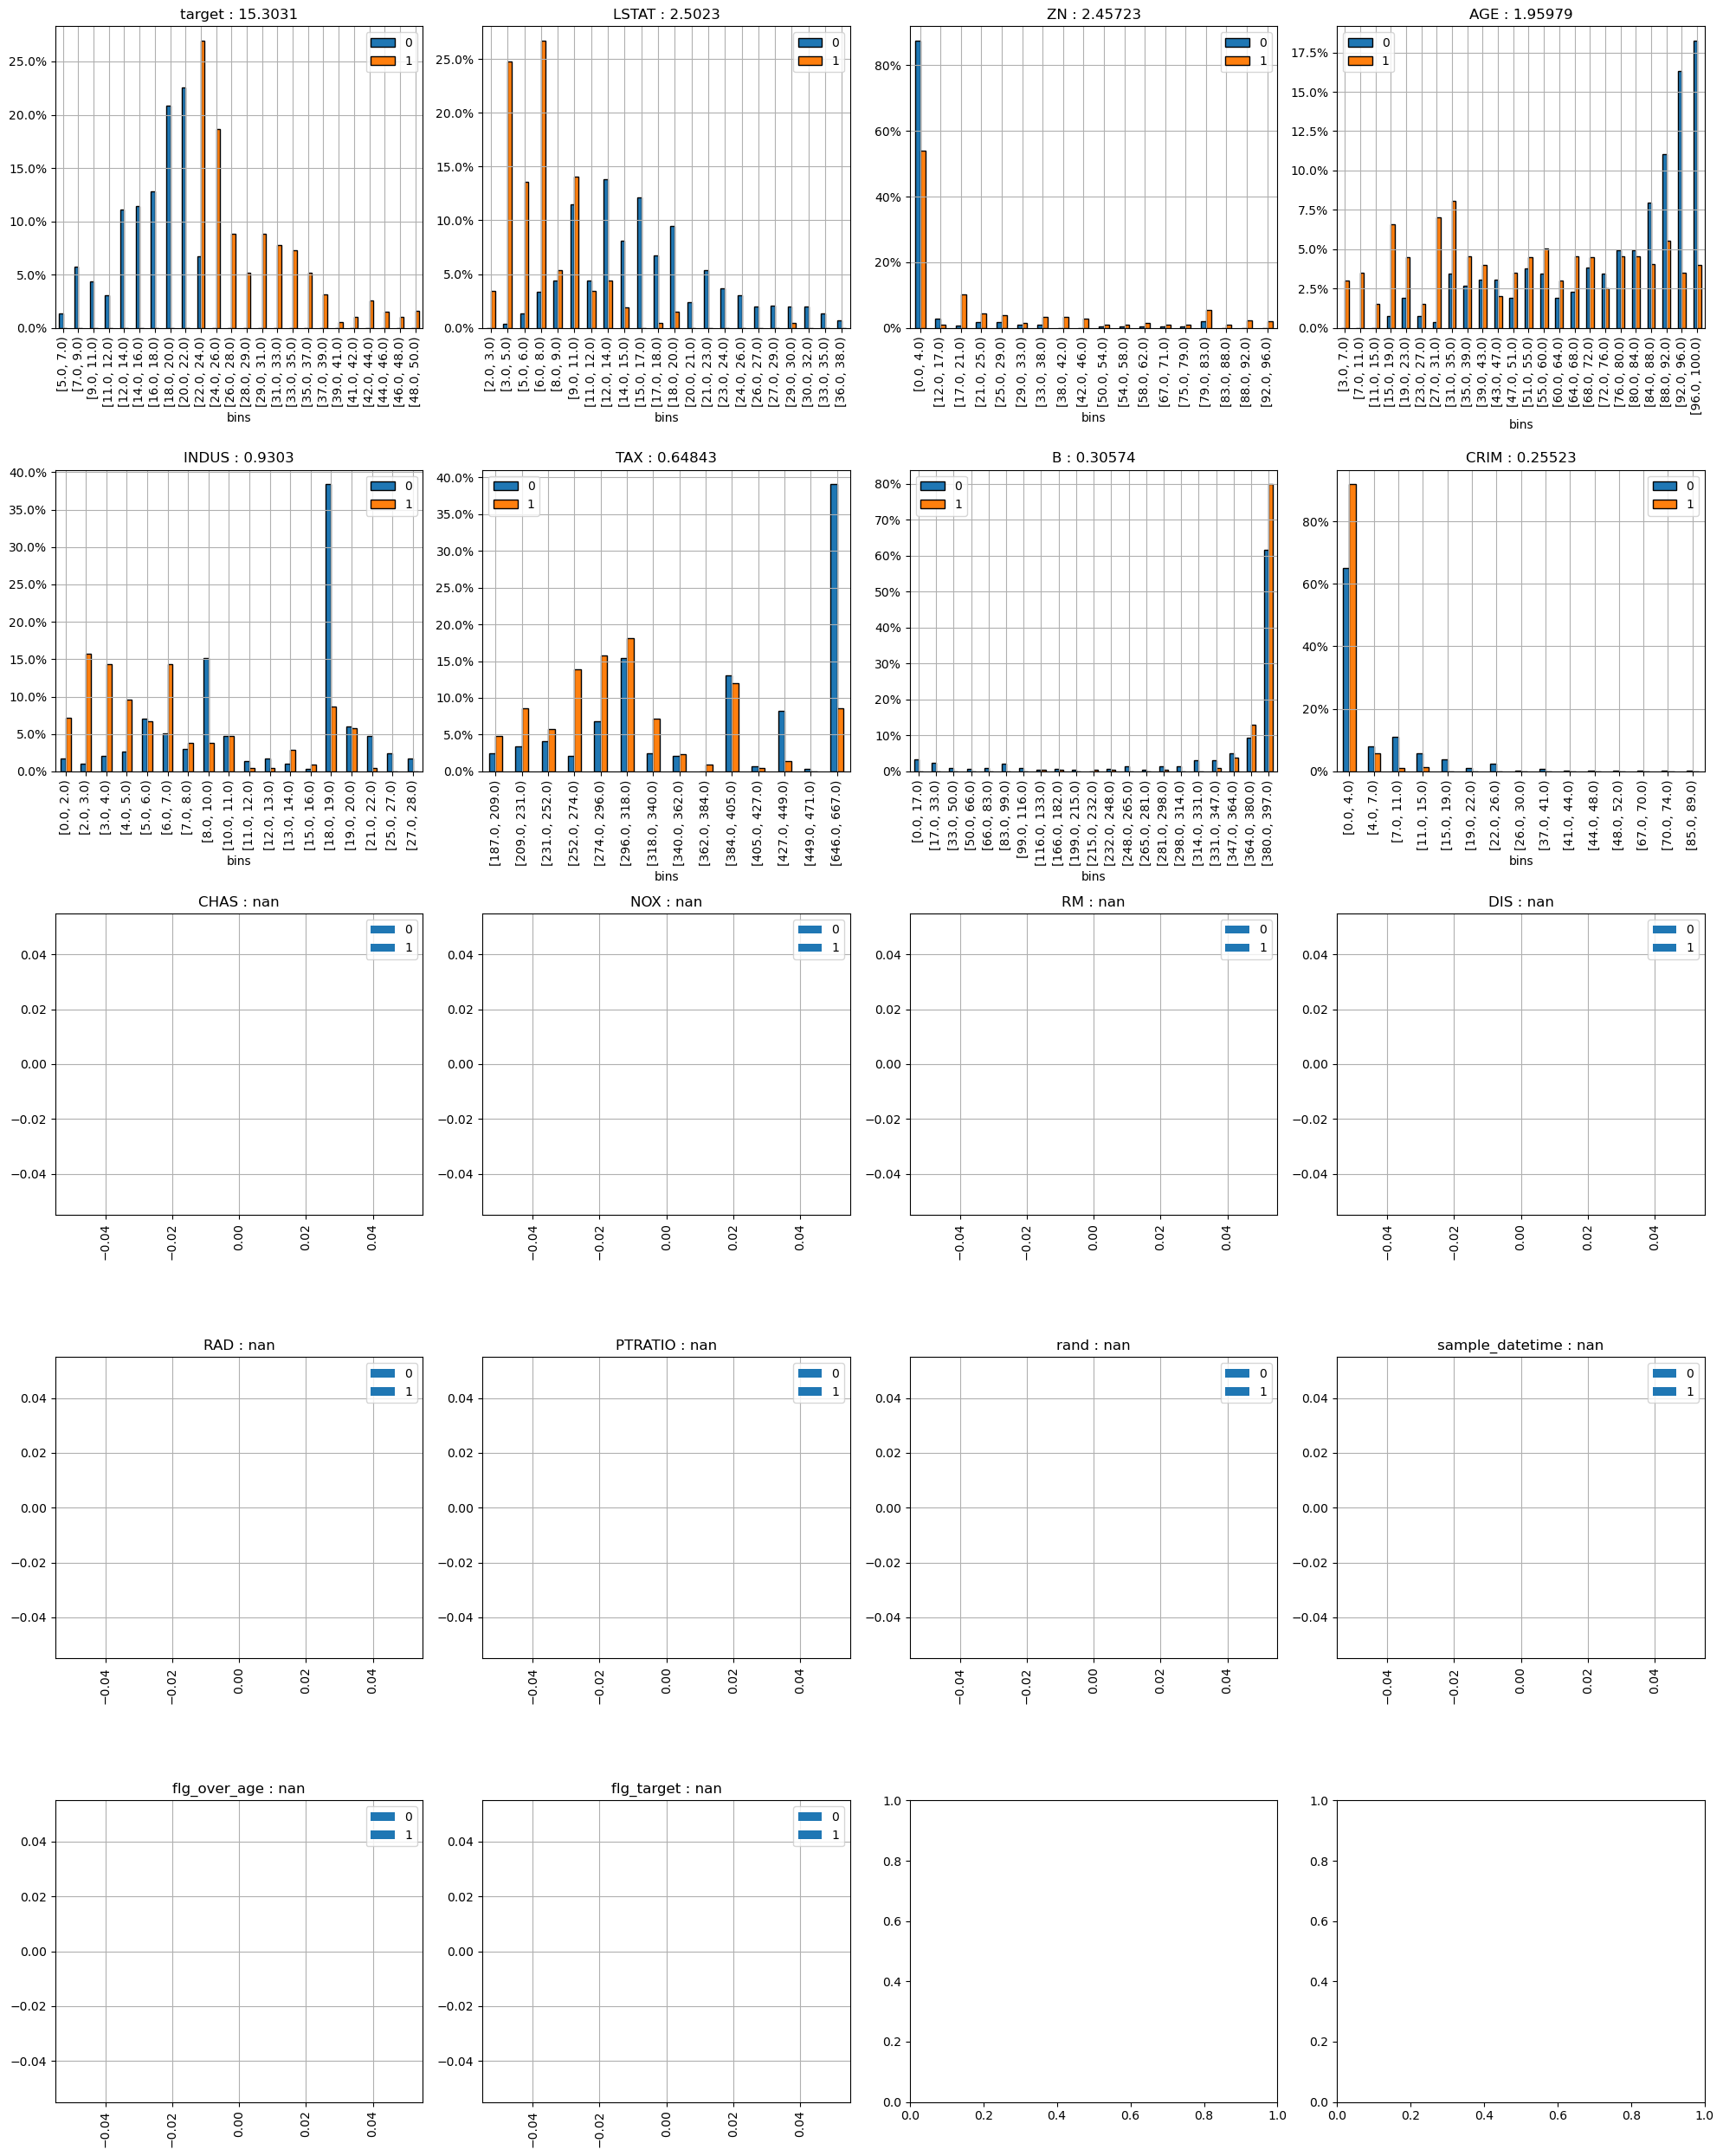

In [16]:
KL1.plot()

In [27]:
aplt = AllPlot(bun_df2,sample_size = 100000)
#aplt = all_plot(bun_df)

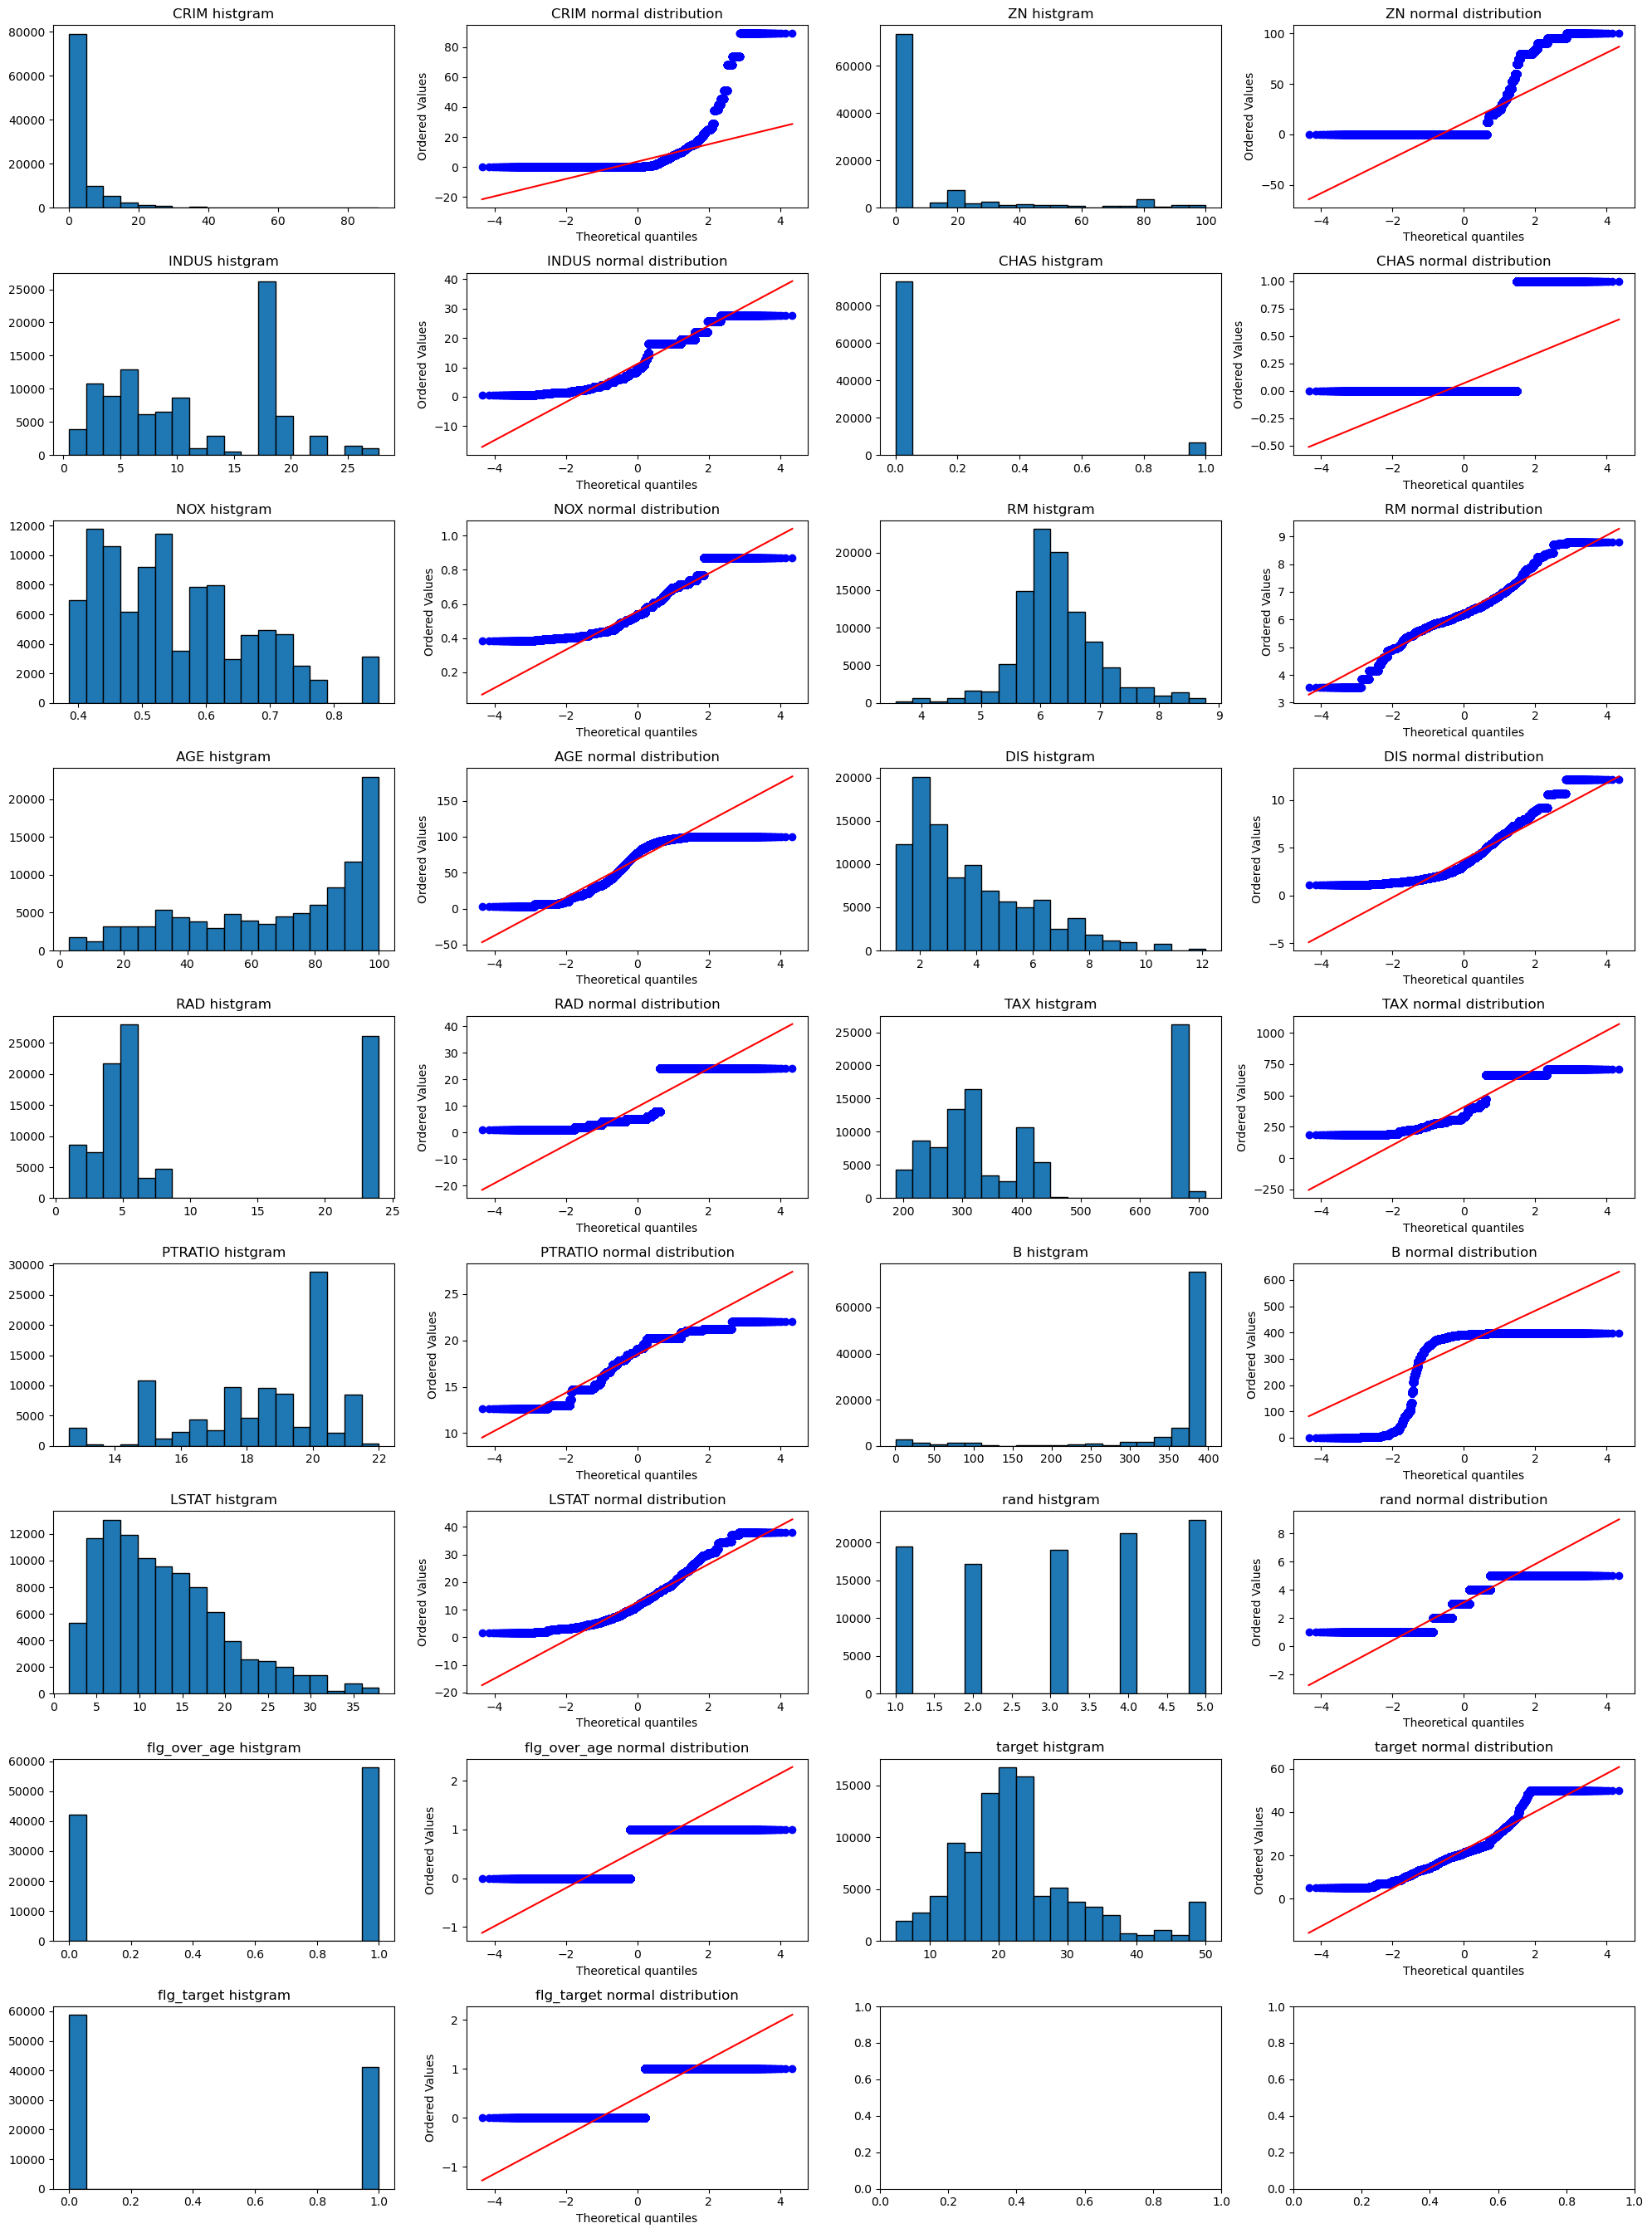

In [28]:
aplt.Histgram()

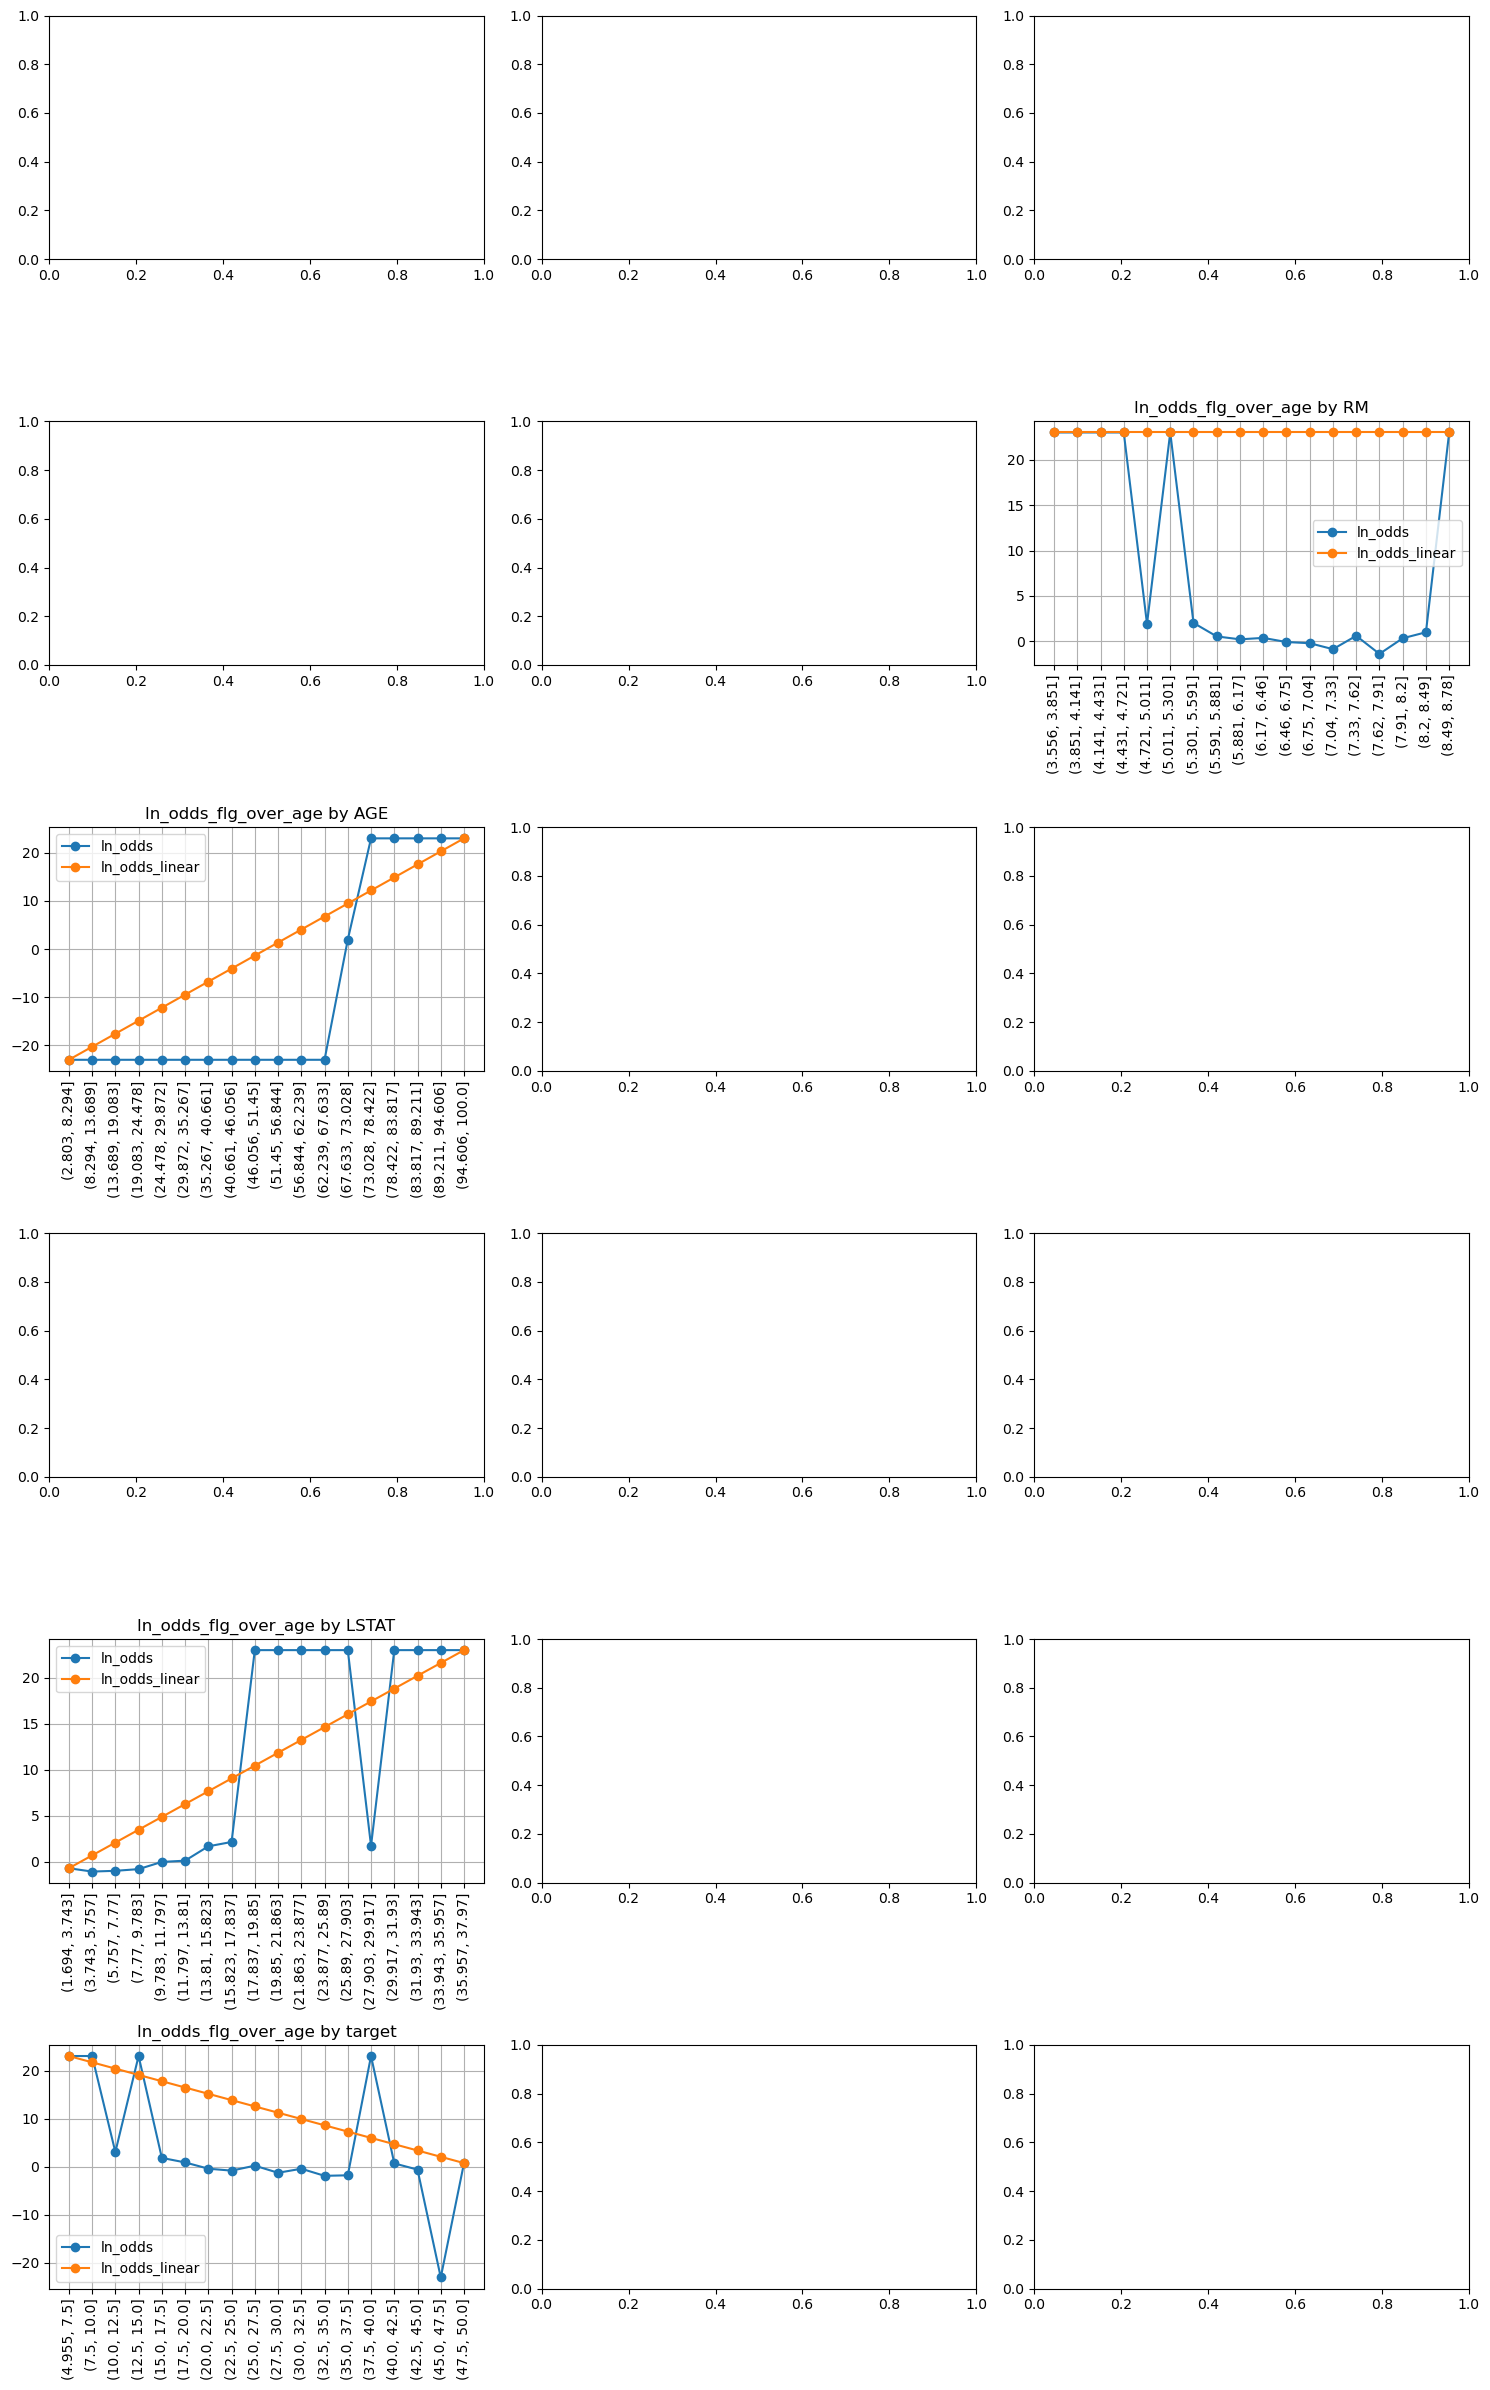

In [29]:
aplt.LinearityCheckBinaryTarget(target_="flg_over_age")

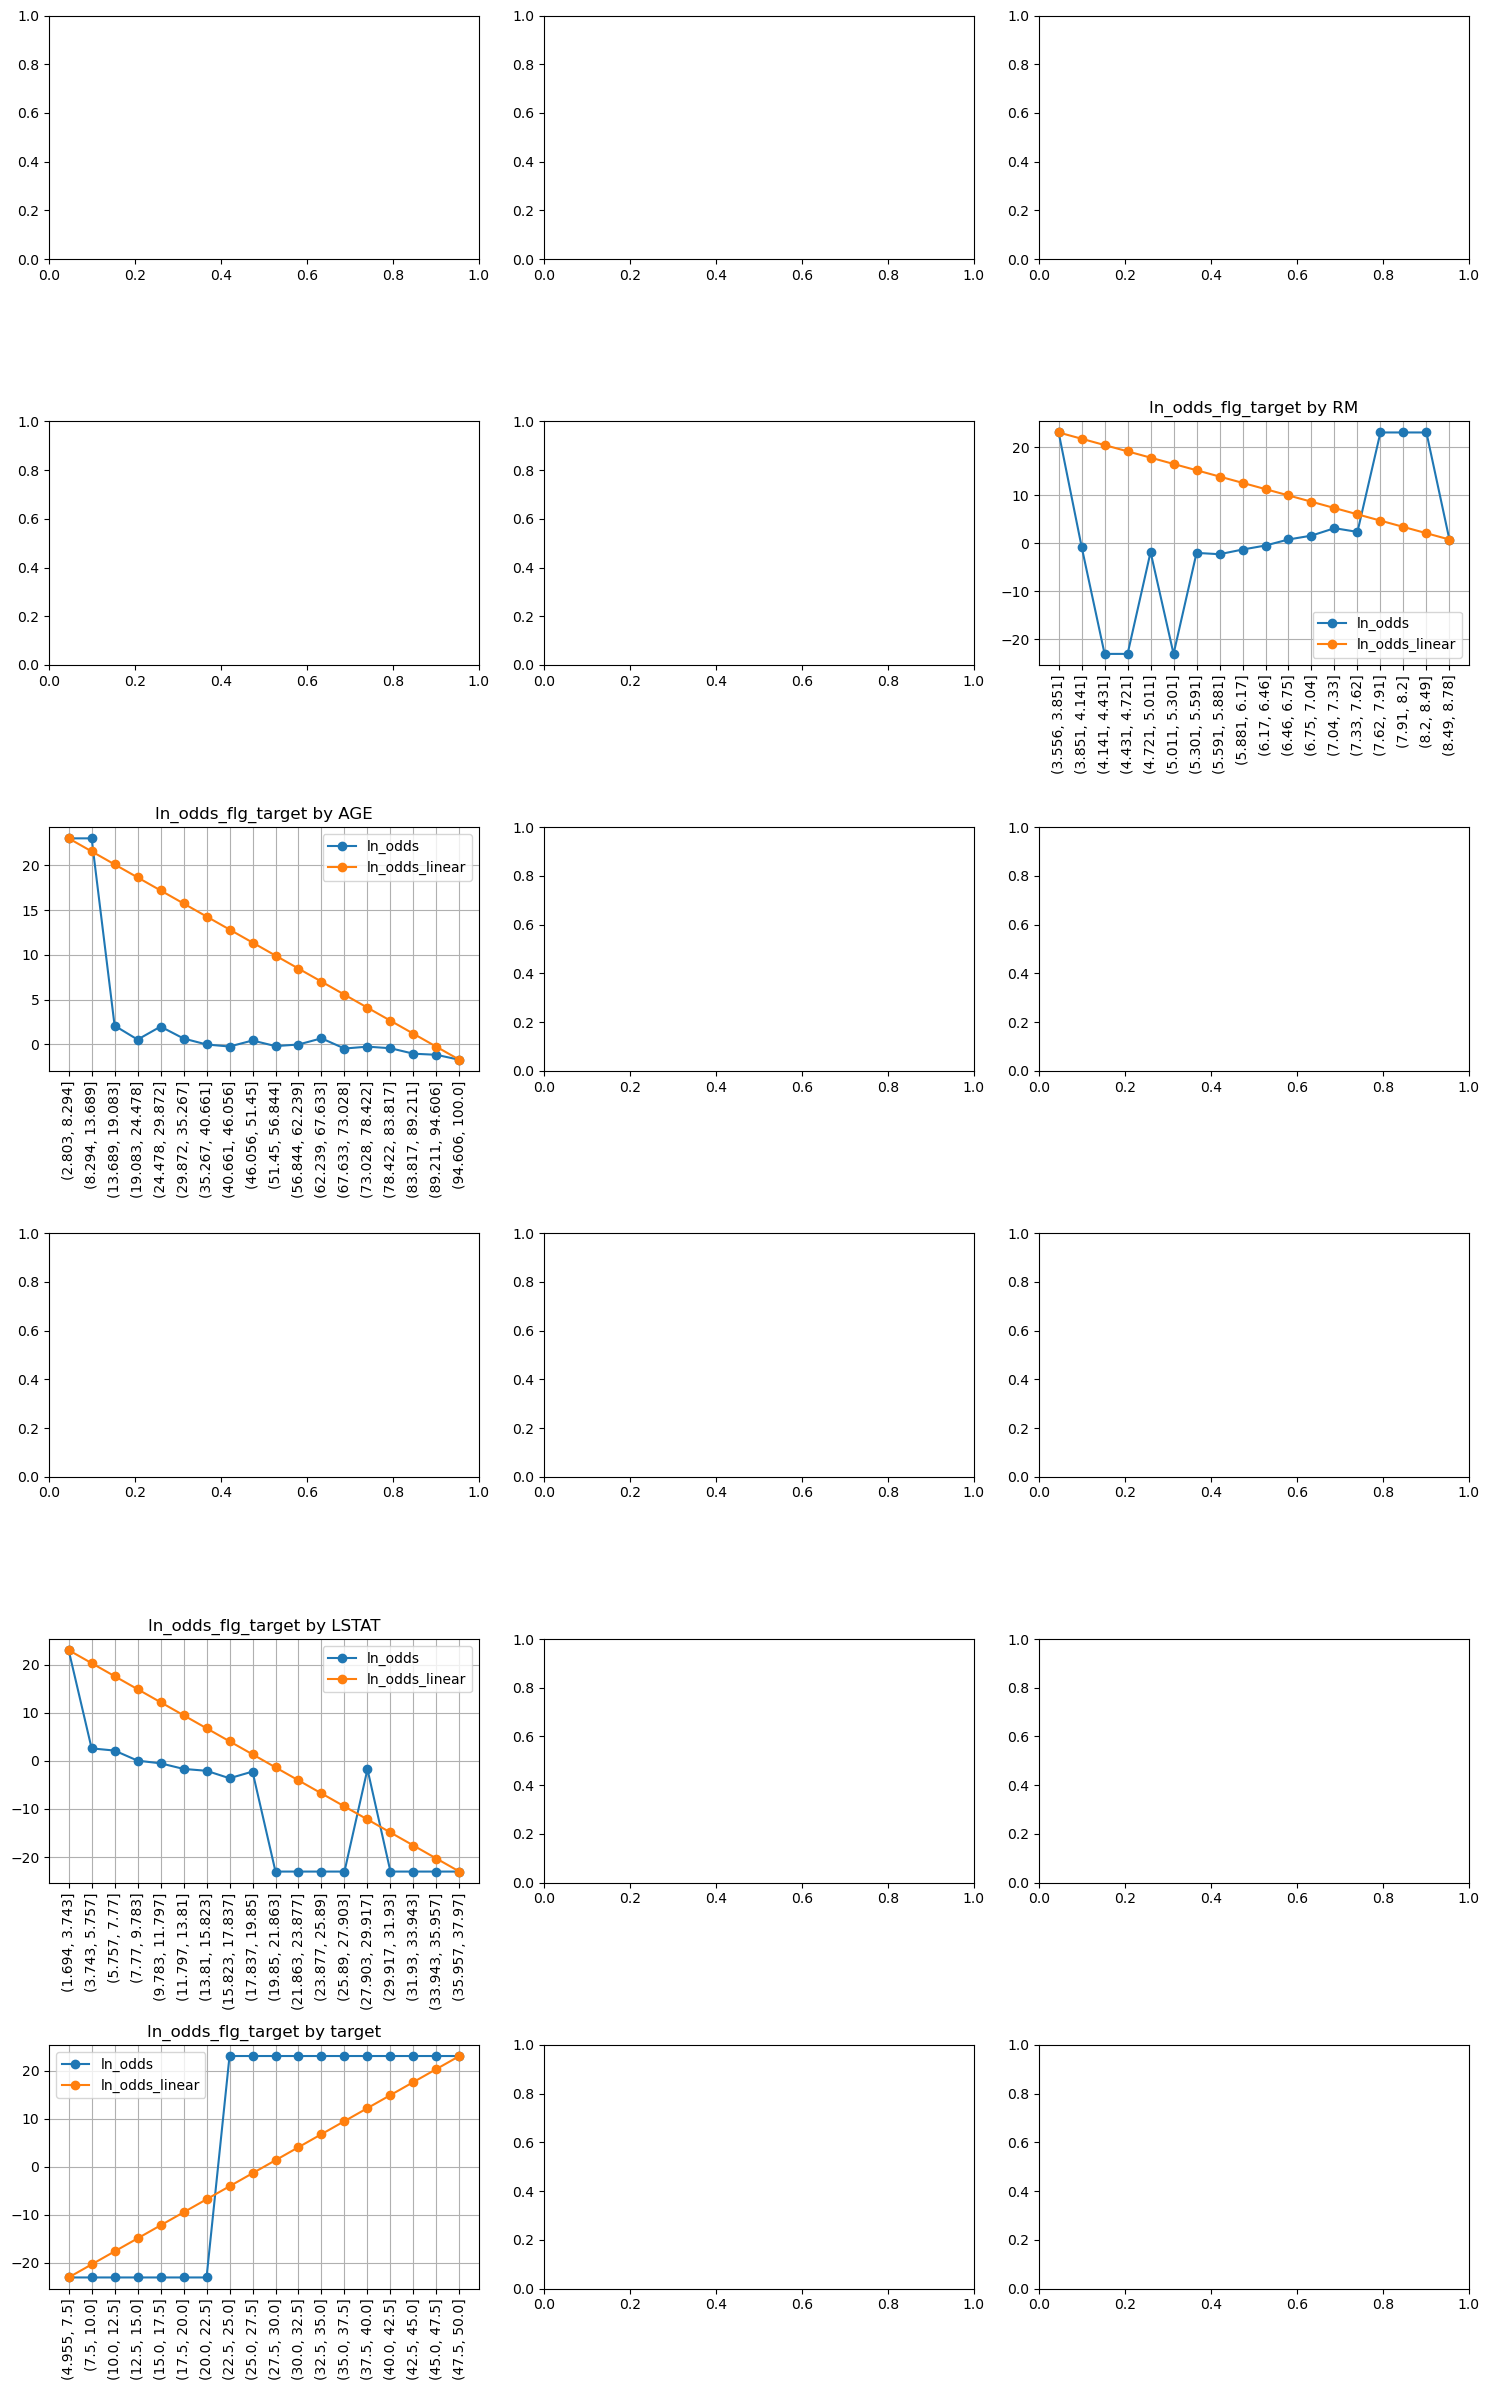

In [30]:
aplt.LinearityCheckBinaryTarget(target_="flg_target")

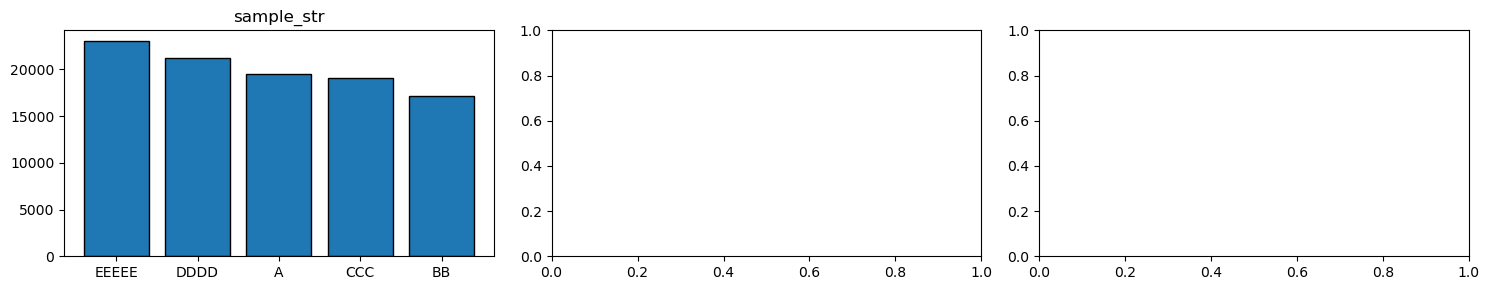

In [31]:
aplt.CountByCategory()

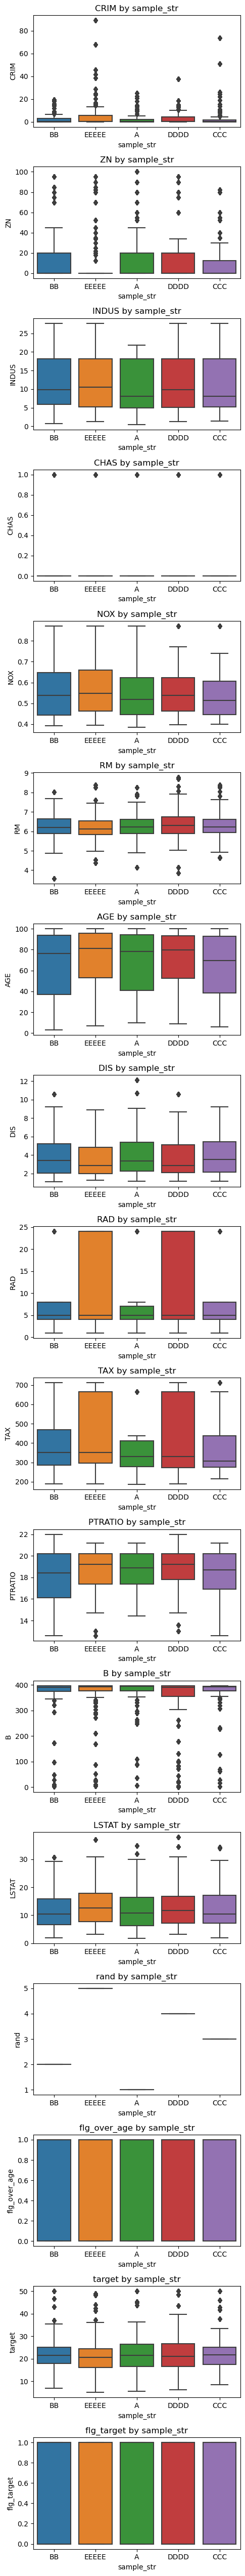

In [32]:
aplt.Boxplot()

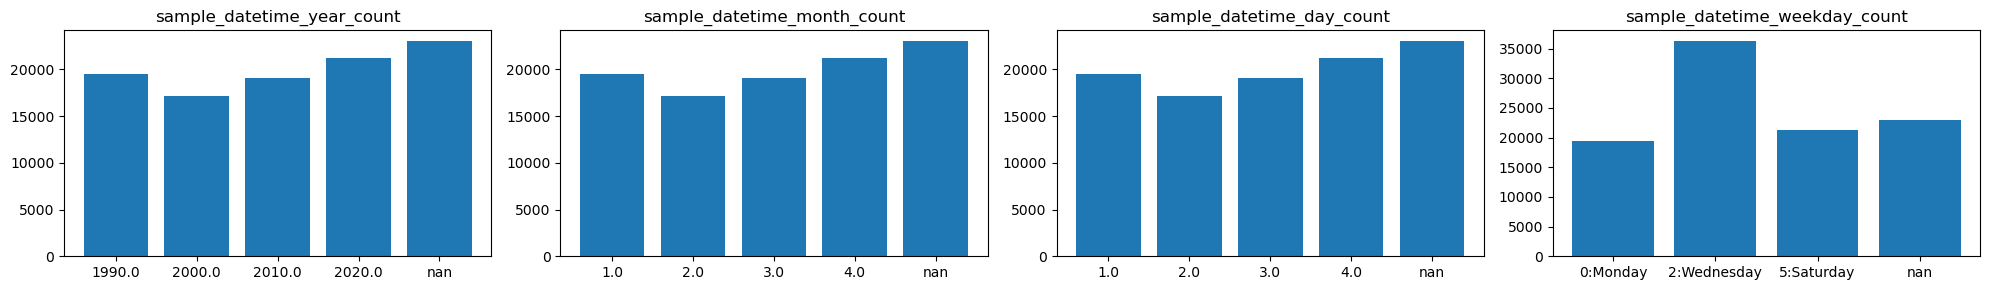

In [33]:
aplt.CountByDatetime()

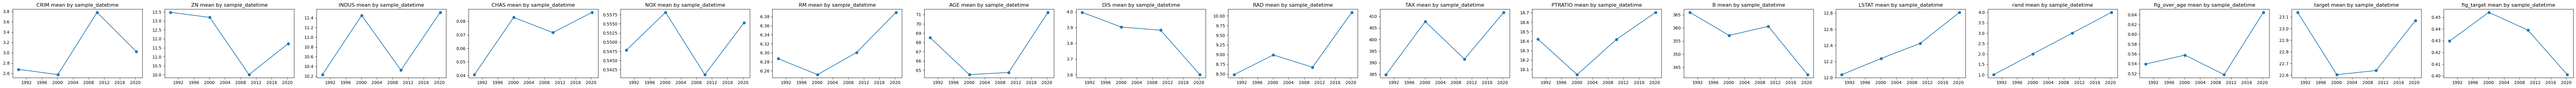

In [34]:
aplt.MeanByTimeseries()